The MNIST 

In [1]:
## Loading MNIST dataset from keras
import keras
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
%matplotlib inline

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Normalize x
X_train = X_train.astype(float) / 255.
X_test = X_test.astype(float) / 255.

# Flatten input: Changing dimension of input images from N*28*28 to N*784
X_train = X_train.reshape([X_train.shape[0], -1])
X_test = X_test.reshape([X_test.shape[0], -1])

# Printing dimensions
print(X_train.shape, y_train.shape)

Using TensorFlow backend.


(60000, 784) (60000,)


Plot some sample images along with their labels.

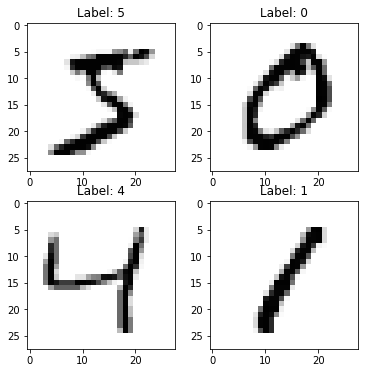

In [2]:
plt.figure(figsize=[6,6])
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.title("Label: %i"%y_train[i])
    plt.imshow(X_train[i].reshape([28,28]),cmap='Greys');

As we can see our current image data has dimension N * (28x28). We flatted it above into arrays of Nx784. We nowone-hot encode our target variable.

In [3]:
## Changing labels to one-hot encoded vector
lb = LabelBinarizer()
y_train_one_hot = lb.fit_transform(y_train)
y_test_one_hot = lb.transform(y_test)
print('Train labels dimension:');print(y_train_one_hot.shape)
print('Test labels dimension:');print(y_test_one_hot.shape)
print(y_train_one_hot[1000])

Train labels dimension:
(60000, 10)
Test labels dimension:
(10000, 10)
[1 0 0 0 0 0 0 0 0 0]


Now we have processed the data, let's start building our multi-layer perceptron using tensorflow. We will begin by importing the required libraries.

In [4]:
# Define function for plotting history
import matplotlib.pyplot as plt
def plot_metrics(history, metrics =  ['loss', 'accuracy']):
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    #plt.figsize=(20,10)
    plt.subplot(1,len(metrics),n+1)
    plt.tight_layout(pad=2)
    plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    plt.legend()

In [5]:
## Importing required libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

### Define & Compile Keras Model
Models in Keras are defined as a sequence of layers. We create a `Sequential` model and add layers one at a time until we are happy with our network architecture.

The first thing to get right is to ensure the input layer has the right number of input features. This can be specified when creating the first layer with the input_dim argument and setting it to 784 for the 784 input pixels.

In this example, we will use a fully-connected network structure with three layers.

Fully connected layers are defined using the `Dense` class. We can specify the number of neurons or nodes in the layer as the first argument, and specify the activation function using the activation argument.

We will use the rectified linear unit activation function referred to as `ReLU` on the first two layers and the `Sigmoid` function in the output layer.

We can piece it all together by adding each layer:
The model expects rows of data with 784 variables (the input_dim=784 argument)
The first hidden layer has 512 nodes and uses the relu activation function.
The second hidden layer has 256 nodes and uses the relu activation function.
The output layer has 10 nodes for the ten digits.

Let's start our model construction by defining initialization variables.

In [6]:
# Defining various initialization parameters for 784-512-256-10 MLP model
num_classes = y_train_one_hot.shape[1]; num_features = X_train.shape[1]
num_layers_0 = 512; num_layers_1 = 256

# Define the keras model
model = Sequential()
model.add(Dense(num_layers_0, input_dim=num_features, activation='relu'))
model.add(Dense(num_layers_1, activation='relu'))
model.add(Dense(num_classes, activation='sigmoid'))

# Compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'mae'])

### Fit Keras Model
Now it is time to execute the model on our loaded data by calling the fit() function on the model.

Training occurs over epochs and each epoch is split into batches.
Epoch: One pass through all of the rows in the training dataset.
Batch: One or more samples considered by the model within an epoch before weights are updated.
One epoch is comprised of one or more batches, based on the chosen batch size and the model is fit for many epochs. 

For this problem, we will run for a small number of epochs (14) and use a relatively small batch size of 128.

The work happens on your CPU or GPU. No GPU is required for this example.

In [7]:
# Fit keras model
history = model.fit(X_train, y_train_one_hot, epochs=14, batch_size=128, validation_split = 0.20)

Train on 48000 samples, validate on 12000 samples
Epoch 1/14
48000/48000 [==============================] - 3s 67us/step - loss: 0.0624 - accuracy: 0.9796 - mae: 0.0382 - val_loss: 0.0279 - val_accuracy: 0.9912 - val_mae: 0.0160
Epoch 2/14
48000/48000 [==============================] - 3s 64us/step - loss: 0.0212 - accuracy: 0.9932 - mae: 0.0123 - val_loss: 0.0193 - val_accuracy: 0.9938 - val_mae: 0.0106
Epoch 3/14
48000/48000 [==============================] - 3s 54us/step - loss: 0.0134 - accuracy: 0.9955 - mae: 0.0079 - val_loss: 0.0153 - val_accuracy: 0.9947 - val_mae: 0.0078
Epoch 4/14
48000/48000 [==============================] - 3s 54us/step - loss: 0.0091 - accuracy: 0.9970 - mae: 0.0055 - val_loss: 0.0153 - val_accuracy: 0.9951 - val_mae: 0.0070
Epoch 5/14
48000/48000 [==============================] - 2s 46us/step - loss: 0.0064 - accuracy: 0.9980 - mae: 0.0040 - val_loss: 0.0160 - val_accuracy: 0.9947 - val_mae: 0.0068
Epoch 6/14
48000/48000 [==============================]

In [8]:
# Define the keras model
model2 = Sequential()
model2.add(Dense(num_layers_0, input_dim=num_features, activation='relu'))
model2.add(Dense(num_layers_1, activation='relu'))
model2.add(Dense(num_classes, activation='sigmoid'))

# Compile the keras model
model2.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_logarithmic_error','accuracy'])
# Fit keras model
history2 = model2.fit(X_train, y_train_one_hot, epochs=14, batch_size=64, validation_split = 0.20)

Train on 48000 samples, validate on 12000 samples
Epoch 1/14
48000/48000 [==============================] - 4s 86us/step - loss: 0.0164 - mean_squared_logarithmic_error: 0.0082 - accuracy: 0.8937 - val_loss: 0.0064 - val_mean_squared_logarithmic_error: 0.0032 - val_accuracy: 0.9614
Epoch 2/14
48000/48000 [==============================] - 4s 83us/step - loss: 0.0051 - mean_squared_logarithmic_error: 0.0025 - accuracy: 0.9705 - val_loss: 0.0049 - val_mean_squared_logarithmic_error: 0.0024 - val_accuracy: 0.9702
Epoch 3/14
48000/48000 [==============================] - 5s 95us/step - loss: 0.0035 - mean_squared_logarithmic_error: 0.0017 - accuracy: 0.9797 - val_loss: 0.0042 - val_mean_squared_logarithmic_error: 0.0020 - val_accuracy: 0.9747
Epoch 4/14
48000/48000 [==============================] - 5s 107us/step - loss: 0.0024 - mean_squared_logarithmic_error: 0.0012 - accuracy: 0.9864 - val_loss: 0.0036 - val_mean_squared_logarithmic_error: 0.0018 - val_accuracy: 0.9764
Epoch 5/14
48000/

### Check Training History
In this section, we will produce plots of your model's accuracy and loss on the training and validation set. These are useful to check for overfitting. Additionally, you can produce these plots for any of the metrics you created above. False negatives are included as an example.

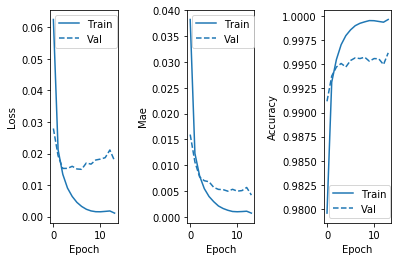

In [9]:
# Plot the training/validation history of our Keras model
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plot_metrics(history,  metrics =  ['loss','mae', 'accuracy'])

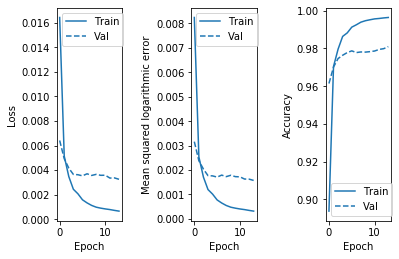

In [10]:
plot_metrics(history2, metrics =  ['loss', 'mean_squared_logarithmic_error', 'accuracy'])

### Evaluate Metrics
You can use a confusion matrix to summarize the actual vs. predicted labels where the X axis is the predicted label and the Y axis is the actual label.

In [11]:
import sklearn
import seaborn as sns
from sklearn.metrics import confusion_matrix
def plot_cm(labels, predictions):
  cm = confusion_matrix(labels, predictions)
  plt.figure(figsize=(8,8))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion Matrix')
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

Evaluate your model on the test dataset and display the evaluation metrics and the confusion matrix.

loss :  0.01460145233939893

accuracy :  0.9965102672576904

mae :  0.0038368194364011288



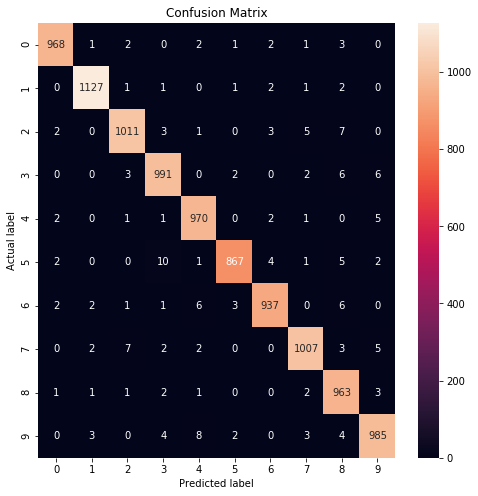

In [13]:
y_test_predictions = model.predict_classes(X_test, batch_size=128)
baseline_results = model.evaluate(X_test, y_test_one_hot,
                                  batch_size=128, verbose=0)

for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
  print()

plot_cm(y_test, y_test_predictions)

loss :  0.003220447663848421

mean_squared_logarithmic_error :  0.0015546896029263735

accuracy :  0.9817000031471252



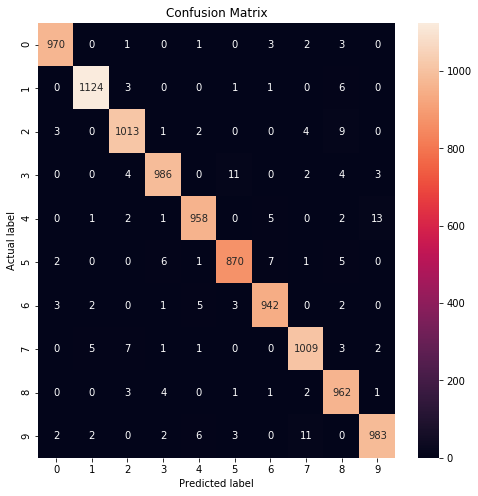

In [14]:
y_test_predictions = model2.predict_classes(X_test, batch_size=128)
baseline_results = model2.evaluate(X_test, y_test_one_hot,
                                  batch_size=128, verbose=0)

for name, value in zip(model2.metrics_names, baseline_results):
  print(name, ': ', value)
  print()

plot_cm(y_test, y_test_predictions)

### Conclusion
As we can see we have successfully trained a Multi-Layer perceptron which was written in Keras using TensorFlow backend with high validation accuracy!